# Raccoon Creek Research Lab
### CS 181-02 Project 1 9/34/18

## Authors

* **Bella Yang** - yang_b1@denison.edu
* **Federico Read Grullon** - readgr_r1@denison.edu
* **Xubo Wang** - wang_x4@denison.edu

## Project Description

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;For our project we conducted a data driven analysis of the relationship between the weather patterns in Licking County and measurements of the Raccoon Creek watershed. 
While there are a few “Raccoon Creek”s in Ohio, the Raccoon Creek we are analyzing runs through Licking County. This river flows through Johnston, Alexandria, Granville and then Newark in the direction of the Ohio River. The Raccoon Creek watershed consists of the area that it flows over and namely the midwest portion of the Licking County area. However, our study is more specifc to the Johnston-Alexandria-Granville-Newark stretch. The watershed has a drainage basin of 78 square miles, where rain water collects into it. It also averages 7 feet in depth (by gage height in Granville), and 50 feet wide in most places along the main creek. 

## Data Collection and Measurement Details

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; For our research, we observe two measurements of Raccoon Creek gathered west of Granville, Ohio, and one measurement of local weather in the area. These measure specifically include: the *gage height* (water level above the creek bed, in feet), and *discharge* (water flow velocity, in cubic feet per second) of Raccoon Creek, as well as the local precipitation (in inches).

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; While there are quite a few data sensors and recorders within the drainage area, (51 in fact, with 17 on the main Racoon Creek flow), we use gage and discharge data gathered where the creek crosses Moots Run west of Granville. These sensors are owned and maintained by the United States Geological Survey Ohio Water Science Center (USGS NWIS) and is made publicly available on the USGS website:
https://waterdata.usgs.gov/usa/nwis/uv?03145483

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The precipitation data we used is gathered, organized, and made publically available by the National Oceanic and Atmospheric Administration (NOAA) on their database website:
https://www.ncdc.noaa.gov/cdo-web


## Thesis Proposal
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; We believe that there could be a positive correlation between local precipitation and creek discharge. As such, we would like to investigate the relations between discharge, gage height, and precipitation for Raccoon Creek in the year between August, 2017 and July, 2018.





## Notebook Software

* **Jupyter Notebook** - http://jupyter.org/



## Analysis with Code

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; We've written the following code to help analyze and breakdown the information we were provided with.



## Process of finding the relations


In [1]:
#Below were all the packages that we have used in the report
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Read in and Modify Raccoon Creek Data

By reading the data in, we found our that the column name is not clear for us to read. So, we changed our column name and we drop some of the columns that we don't need. After that, since we only want to working with different dates through the whole 12 months, we decided to split the datetime column and only have date left. In that way, we could take the average number of each day which will give us a clear data frame with 365 days.

In [2]:
#read in data
raw = pd.read_csv('RaccoonCreekFlowData.txt', sep = '\t', skiprows = 31)
raw = raw.rename(columns = {'agency_cd':'agency','site_no':'site_Number','tz_cd':'Time_Zone','110246_00065':'Gage Height (ft)','110247_00060':'Discharge (ft^3/s)','110248_00045':'Precipitation'})

#drop the columns with qualification codes and the column of precipitation with no data
raw = raw.drop(['110246_00065_cd','110247_00060_cd','110248_00045_cd','Precipitation','agency','Time_Zone','site_Number'],axis=1)
print(raw)

#split date and drop time
raw['Date'] = raw['datetime'].str.split(' ').str.get(0) 
raw = raw.drop(['datetime'],axis=1)
raw = raw[['Date','Gage Height (ft)','Discharge (ft^3/s)']]
print(raw)

               datetime  Gage Height (ft)  Discharge (ft^3/s)
0      2017-08-01 00:00               NaN                16.4
1      2017-08-01 00:15               NaN                16.4
2      2017-08-01 00:30               NaN                16.4
3      2017-08-01 00:45               NaN                16.4
4      2017-08-01 01:00               NaN                16.4
5      2017-08-01 01:15               NaN                16.4
6      2017-08-01 01:30               NaN                16.4
7      2017-08-01 01:45               NaN                16.4
8      2017-08-01 02:00               NaN                16.4
9      2017-08-01 02:15               NaN                16.4
10     2017-08-01 02:30               NaN                16.4
11     2017-08-01 02:45               NaN                16.4
12     2017-08-01 03:00               NaN                16.4
13     2017-08-01 03:15               NaN                16.4
14     2017-08-01 03:30               NaN                16.4
15     2

### Average and Fit Data to Day

Since the data was collected every 15 minutes, we have 96 data points every day. Therefore, we calculate the average discharge for everyday value and create a new dataset which will have one data point every day and have a total of 365 days.

In [4]:
#average out discharge and gage height
raw2 = raw.groupby(by='Date').mean()
raw2 = raw2.reset_index()
print(raw2)

           Date  Gage Height (ft)  Discharge (ft^3/s)
0    2017-08-01               NaN           16.240625
1    2017-08-02               NaN           15.691667
2    2017-08-03               NaN           20.226042
3    2017-08-04               NaN           18.687500
4    2017-08-05               NaN           15.893750
5    2017-08-06               NaN           13.691667
6    2017-08-07               NaN           13.890625
7    2017-08-08               NaN           13.736458
8    2017-08-09               NaN           12.431250
9    2017-08-10               NaN           11.722917
10   2017-08-11               NaN           11.660417
11   2017-08-12               NaN           11.644792
12   2017-08-13               NaN           10.806250
13   2017-08-14               NaN           10.352500
14   2017-08-15               NaN            9.683978
15   2017-08-16               NaN            9.332604
16   2017-08-17               NaN           10.487742
17   2017-08-18             

### Read in Precipitation Data

In [3]:
#read in precipitation data
precip = pd.read_csv('PrecipData.csv',skiprows=5)
precip = precip.iloc[:,0:2]
print(precip)

        Date  Precip (in)
0     8/1/17         0.00
1     8/2/17         0.00
2     8/3/17         0.06
3     8/4/17         0.04
4     8/5/17         0.01
5     8/6/17         0.00
6     8/7/17         0.07
7     8/8/17         0.18
8     8/9/17         0.00
9    8/10/17         0.00
10   8/11/17         0.09
11   8/12/17         0.20
12   8/13/17         0.00
13   8/14/17         0.00
14   8/15/17         0.00
15   8/16/17         0.01
16   8/17/17         0.00
17   8/18/17         0.45
18   8/19/17         0.01
19   8/20/17          NaN
20   8/21/17          NaN
21   8/22/17         0.00
22   8/23/17         0.35
23   8/24/17         0.00
24   8/25/17         0.00
25   8/26/17         0.00
26   8/27/17         0.00
27   8/28/17         0.00
28   8/29/17         0.01
29   8/30/17         0.02
..       ...          ...
336   7/3/18         0.05
337   7/4/18         0.34
338   7/5/18         0.04
339   7/6/18         0.00
340   7/7/18         0.00
341   7/8/18         0.00
342   7/9/18

### Clean and Combine our Data Sets

Since we want to know the relations between discharge and preciptation, it's better that we put them into one data frame, and we called that data frame RaccoonCreek. And from the table of precipitation above, we noticed that there are 366 rows which matches our table of the raw data frame. Since they have the same row, we could put them together as our final data frame.

In [151]:

#Final Data Frame 
Precip2 = precip.copy()
Precip2 = Precip2.drop(['Date'],axis = 1)
RaccoonCreek = pd.concat([raw2,Precip2],axis=1)

print("Our final dataset consists of the following values:")
print(RaccoonCreek)

Our final dataset consists of the following values:
           Date  Gage Height (ft)  Discharge (ft^3/s)  Precip (in)
0    2017-08-01               NaN           16.240625         0.00
1    2017-08-02               NaN           15.691667         0.00
2    2017-08-03               NaN           20.226042         0.06
3    2017-08-04               NaN           18.687500         0.04
4    2017-08-05               NaN           15.893750         0.01
5    2017-08-06               NaN           13.691667         0.00
6    2017-08-07               NaN           13.890625         0.07
7    2017-08-08               NaN           13.736458         0.18
8    2017-08-09               NaN           12.431250         0.00
9    2017-08-10               NaN           11.722917         0.00
10   2017-08-11               NaN           11.660417         0.09
11   2017-08-12               NaN           11.644792         0.20
12   2017-08-13               NaN           10.806250         0.00
13   2017-

### Correlation Between Gage Height and Discharge
#### Can we drop Gage Height? Yes!


According to USGS, discharge is a better measurement of the conditions of the river. Since gage height measures the elevation of the surface water. The data of the measurements is for several specific spots on the river from the streamgaging station, which means that the data points for gage height can not tell the conditions of the whole river. Also, from the graph we plotted, we can see that the peaks appear in gage height also appear in the graph of discharge which means when we have large amount of discharge, the gage height is also high. Thus, since gage height and discharge have identical measurements, and we know discharge is a better measurement, then, we could drop the column gage height and just use discharge for us to analyze. Moreover, we found that if the river banks are irregular, then the relation between gage height and discharge is non-linear. Suppose we have a river bank is flat at the bottom, and rising steeply, then the amount of water needed to raise a certain amount height might doubles or triples. However, in our graph of discharge vs gage height, we can see they are linearly dependent, thus, we speculate that the river bank of Raccoon Creek is somehow regular.


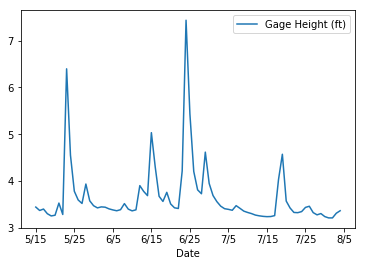

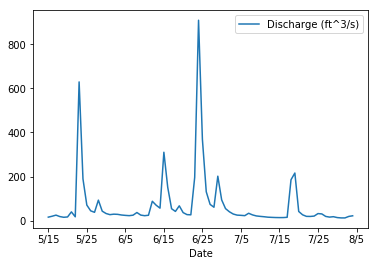

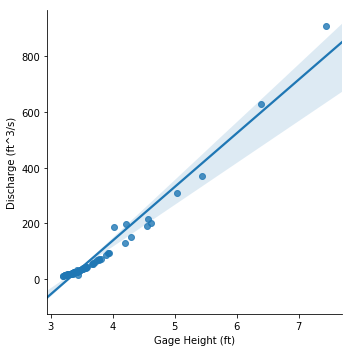

In [152]:
#Show correlation between Gage Height and Discharge
RaccoonCreekClean = RaccoonCreek.loc[RaccoonCreek['Gage Height (ft)'] == RaccoonCreek['Gage Height (ft)']] 
RaccoonCreekClean = RaccoonCreekClean.reset_index().drop(['index'], axis = 1)

#Compare discharge and gage height where possible
gageLine = RaccoonCreekClean.plot.line(x = 'Date', y = 'Gage Height (ft)')
dischargeLineClean = RaccoonCreekClean.plot.line(x = 'Date', y = 'Discharge (ft^3/s)')

#Aproximate date labels
labels = ['','5/15','5/25','6/5','6/15','6/25','7/5','7/15','7/25', '8/5']
gageLine.set_xticklabels(labels)
dischargeLineClean.set_xticklabels(labels)

#notice that the graphs look near identical (other than the scale)
#this means we may be able to use discharge to compare precipitation, as it has more data
#linear regression to show correlation between the two
sns.lmplot(x = 'Gage Height (ft)', y = 'Discharge (ft^3/s)', data = RaccoonCreekClean, fit_reg = True)


### Compare Discharge to Precipitation

Based on the research we have done, the discharge of a stream is affected by several factors. The most significant one is the weather. The discharge increases significantly after heavy rainfall since there would be more water entering the stream. Thus, we expect that the discharge is proportional to the precipitation, whereas the discharge increases while precipitation increases, and the discharge decreases while the precipitation decreases. By looking at the graphs of discharge and precipitation by month, we find out that when precipitation increases, the discharge also increases, and that matches the result of our research. 




Based on the report of average precipitation in Granville through a year, we found that from the near-end of March to the end of August is so called the “wet season”, which means in these months, the expected daily chance of precipitation is relatively larger than that of other months. Thus, we expect most of the precipitation occurs among these months. According to our data, we found that the maximum precipitation occurs from March to June and maximum discharge occurs from Feburary to April. This is not what we expected based on our research, but we can see from the graph of discharge that the two maximum peaks occurs from Feburary to June.



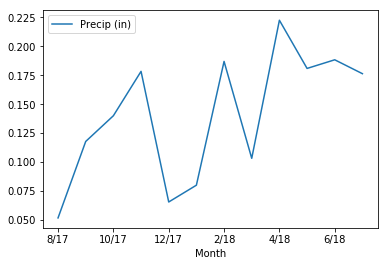

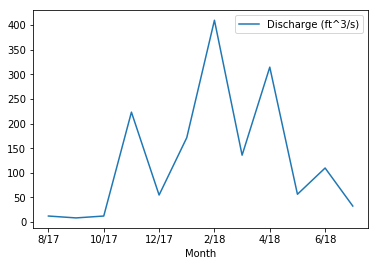

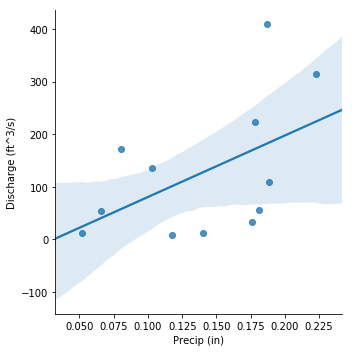

In [153]:
#Compare Discharge to Precipitation!
#Daily comparissons are confusing, compare by monthly average
MonthRaccoonCreek = RaccoonCreek.copy()
MonthRaccoonCreek['Month'] = precip['Date'].str.split('/').str.get(0) + "/" + precip['Date'].str.split('/').str.get(2)
MonthRaccoonCreek = MonthRaccoonCreek.drop(['Date','Gage Height (ft)'], axis = 1)

MonthRaccoonCreek = MonthRaccoonCreek.groupby(by='Month').mean()
MonthRaccoonCreek = MonthRaccoonCreek.reset_index().reindex([10,11,1,2,3,0,4,5,6,7,8,9])
MonthRaccoonCreek = MonthRaccoonCreek.reset_index().drop(['index'], axis = 1)

precipLine = MonthRaccoonCreek.plot.line(x = 'Month', y = 'Precip (in)')
dischargeLine = MonthRaccoonCreek.plot.line(x = 'Month', y = 'Discharge (ft^3/s)')

#Correct label
months = ['','8/17','10/17','12/17','2/18','4/18','6/18']
precipLine.set_xticklabels(months)
dischargeLine.set_xticklabels(months)

#linear regression
sns.lmplot(x = 'Precip (in)', y = 'Discharge (ft^3/s)', data = MonthRaccoonCreek, fit_reg = True)
plt.show()


## Conclusion
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;So, based on our linear regression graphs and line plots, we can determine that gage height and discharge have a positive relationship, and provide very similar data, so we use discharge instead of gage height to find its correlation with precipitation. Through our comparissons, we have proven that precipitation and discharge have a positive relationship which means when there is more precipitation, the discharge will be higher as well. Moreover, we could use that conclusion to prevent flood events based on monitoring the precipitation amount in the future. 



## Acknowledgments

Thank you to NOAA and USGS NWIS for providing us with the information we base our project on.
_______________________________________________________________________________________________

## References

https://weatherspark.com/y/17316/Average-Weather-in-Granville-Ohio-United-States-Year-Round

https://geographyas.info/rivers/discharge-and-hydrographs/

https://denison.edu/academics/geosciences/wh/48616
